# Exploração de Dados em Texto - Parte 1 

Objetivo: a partir de técnicas de contagem, visualizar e interpretar os dados.
Parte do material baseado em https://github.com/JasonKessler/scattertext#emoji-analysis

"A tool for finding distinguishing terms in corpora, and presenting them in an interactive, HTML scatter plot. Points corresponding to terms are selectively labeled so that they don't overlap with other labels or points."

In [1]:
import scattertext as st
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import wordcloud 

import spacy


In [2]:
nlp = spacy.load('en')

### Conjunto de Dados: Republicanos e Democratas

Discursos de democratas e republicanos em 2012 (eleição). 

In [3]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [10]:
convention_df.head()

,party,text,speaker,tokens
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA,"(Thank, you, ., Thank, you, ., Thank, you, ., ..."
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA,"(Thank, you, so, much, ., Tonight, ,, I, am, s..."
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN,"(Thank, you, ., It, is, a, singular, honor, to..."
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN,"(Hey, ,, Delaware, ., \n, And, my, favorite, D..."
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN,"(Hello, ., \n, Thank, you, ,, Angie, ., I, 'm,..."


#### Algumas estatísticas

In [11]:
print("\nContando documentos\n")
print(convention_df.groupby('party')['text'].count())

print("\nContando palavras")
convention_df.groupby('party').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())


Contando documentos

party
democrat      123
republican     66
Name: text, dtype: int64

Contando palavras


party
democrat      76843
republican    58144
dtype: int64

#### Aplicando NLP com Spacy

In [8]:
convention_df['tokens'] = convention_df.text.apply(nlp)

In [9]:
convention_df.head()

,party,text,speaker,tokens
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA,"(Thank, you, ., Thank, you, ., Thank, you, ., ..."
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA,"(Thank, you, so, much, ., Tonight, ,, I, am, s..."
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN,"(Thank, you, ., It, is, a, singular, honor, to..."
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN,"(Hey, ,, Delaware, ., \n, And, my, favorite, D..."
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN,"(Hello, ., \n, Thank, you, ,, Angie, ., I, 'm,..."


### Nuvem de Palavras e NLP

Aqui eu exploro um pouco a utilização de nuvem de palavras e uma filtragem por processamento de linguagem natural.

In [12]:

# filtra palavras para word cloud de acordo com o que vc deseja da gramática. 
def filtering(tokens,pos):
    
    text = ""
    for token in tokens:
        if not token.is_stop and token.pos_ in pos:
           text += " " + str(token.lemma_).lower() 
    
    return text


# plota palavras
def plot_cloud(words):
    
    cloud = wordcloud.WordCloud(width            = 400, 
                                height           = 400, 
                                background_color ='black',
                                min_font_size    = 10)
    cloud = cloud.generate(words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 


In [13]:
convention_df['only_verbs'] = convention_df['tokens'].apply(lambda x: filtering(x,['VERB']))

In [14]:
convention_df.head()

,party,text,speaker,tokens,only_verbs
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA,"(Thank, you, ., Thank, you, ., Thank, you, ., ...",thank thank thank thank thank thank thank tha...
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA,"(Thank, you, so, much, ., Tonight, ,, I, am, s...",thank introduce
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN,"(Thank, you, ., It, is, a, singular, honor, to...",thank introduce lift look face struggle begin...
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN,"(Hey, ,, Delaware, ., \n, And, my, favorite, D...",want know know admire way walk teach bring tr...
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN,"(Hello, ., \n, Thank, you, ,, Angie, ., I, 'm,...",thank come stand stand introduce deploy elect...


In [15]:
convention_df['only_nouns_subs'] = convention_df['tokens'].apply(lambda x: filtering(x,["NOUN","PROPN"]))
convention_df['only_adjs'] = convention_df['tokens'].apply(lambda x: filtering(x,["ADJ"]))

In [16]:
convention_df.head()

,party,text,speaker,tokens,only_verbs,only_nouns_subs,only_adjs
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA,"(Thank, you, ., Thank, you, ., Thank, you, ., ...",thank thank thank thank thank thank thank tha...,michelle night man malia sasha joe biden vice...,lucky proud good strong loyal young blind wis...
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA,"(Thank, you, so, much, ., Tonight, ,, I, am, s...",thank introduce,tonight love life,thrilled honored proud
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN,"(Thank, you, ., It, is, a, singular, honor, to...",thank introduce lift look face struggle begin...,honor tonight year boston state senator illin...,singular cold cold economic hard real real we...
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN,"(Hey, ,, Delaware, ., \n, And, my, favorite, D...",want know know admire way walk teach bring tr...,delaware democrat jilly beau hunt ashley kid ...,favorite proud single solitary young young gi...
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN,"(Hello, ., \n, Thank, you, ,, Angie, ., I, 'm,...",thank come stand stand introduce deploy elect...,angie tonight wife vice president time teache...,proud proud military personal personal fifth ...


In [17]:
# pega cada linha e junta numa unica string
only_nouns_subs = " ".join(convention_df.only_nouns_subs)
only_adjs       = " ".join(convention_df.only_adjs)
only_verbs      = " ".join(convention_df.only_verbs)    


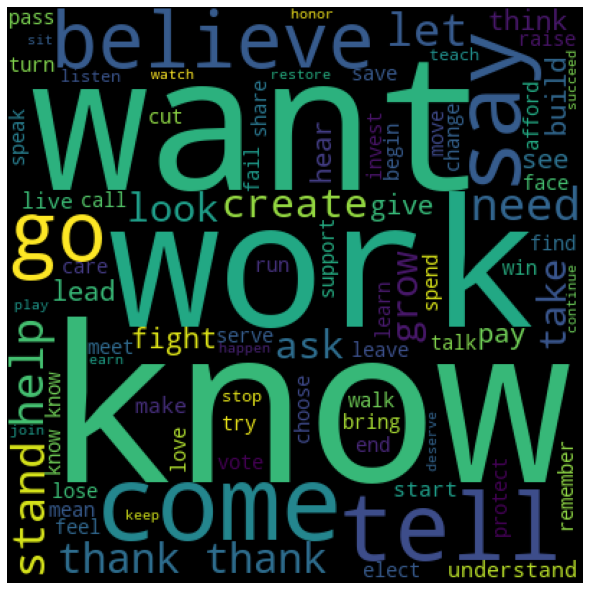

In [20]:
plot_cloud(only_verbs)
    

## Somente democratas

In [21]:
democrats     = convention_df[ convention_df['party'] == 'democrat' ]
dem_only      = " ".join(democrats.only_adjs)    


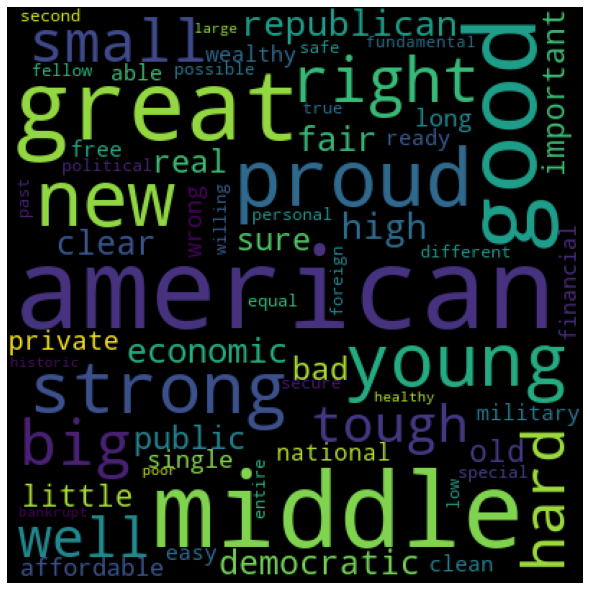

In [22]:
plot_cloud(dem_only)


## Somente Republicanos

In [23]:
republicans = convention_df[ convention_df['party'] == 'republican' ]
rep_only      = " ".join(republicans.only_adjs)    


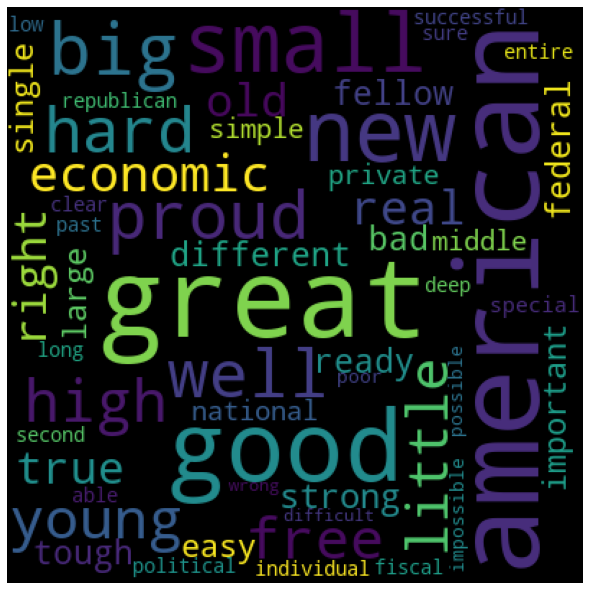

In [24]:
plot_cloud(rep_only)


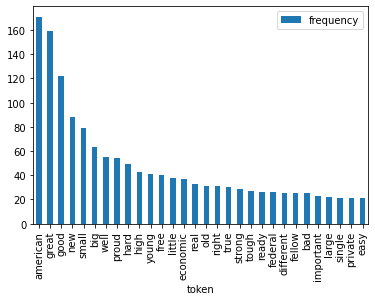

In [31]:
from collections import Counter

# vamos contar as frequências usando dados dos republicanos 
result = Counter(rep_only.split(" ")).items()

df  = pd.DataFrame(result,columns=["token","frequency"])

df.drop(0,inplace=True) # apagando o caracter ''

df  = df.sort_values("frequency",ascending=False)

df  = df.head(30)
df.plot.bar(x=0,y=1);
#df